<h2> Decision Tree Classifier </h2>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv("D:\Thesis Ema 2019\cholesterol.csv", delimiter=",")
df[0:5]


,PatientID,Gender,Age,Presenting_Complaint,BP,Pulse,Diagnosis,Cholesterol,HDL_Cholesterol,LDL_Cholesterol,Triglycerides,Symptom
0,1,Female,35,Headache,High,86.0,HTN,5.81,1.59,4.02,1.63,Yes
1,2,Male,69,Painful Right Ankle,High,NaN,Osteoporosis,4.56,1.36,2.84,2.36,No
2,3,Female,60,Drug refill,Normal,NaN,diabetes,4.01,1.05,2.78,0.99,No
3,4,Male,44,Flue,Normal,NaN,Covid-19,5.23,1.71,3.50,1.37,No
4,5,Female,32,Excessive Sweetings,High,NaN,Hyperhidosis,6.36,1.18,4.44,2.79,Yes


In [3]:
X = df[['Age','BP', 'HDL_Cholesterol','LDL_Cholesterol','Triglycerides']].values
X[0:5]

array([[35, 'High', 1.59, 4.02, 1.63],
       [69, 'High', 1.36, 2.84, 2.36],
       [60, 'Normal', 1.05, 2.78, 0.99],
       [44, 'Normal', 1.71, 3.5, 1.37],
       [32, 'High', 1.18, 4.44, 2.79]], dtype=object)

In [4]:
from sklearn import preprocessing
#le_Gender = preprocessing.LabelEncoder()
#le_Gender.fit(['Female','Male'])
#X[:,1] = le_Gender.transform(X[:,1])
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['Normal', 'High'])
X[:,1] = le_BP.transform(X[:,1])
#le_Symptom = preprocessing.LabelEncoder()
#le_Symptom.fit([ 'Yes', 'No'])
#X[:,3] = le_Symptom.transform(X[:,3])
X[0:5]

array([[35, 0, 1.59, 4.02, 1.63],
       [69, 0, 1.36, 2.84, 2.36],
       [60, 1, 1.05, 2.78, 0.99],
       [44, 1, 1.71, 3.5, 1.37],
       [32, 0, 1.18, 4.44, 2.79]], dtype=object)

In [5]:
y = df["Symptom"]
y[0:5]

0    Yes
1     No
2     No
3     No
4    Yes
Name: Symptom, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [7]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y,test_size=0.3, random_state=3)

In [8]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameter

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [9]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
predTree = drugTree.predict(X_testset)

In [11]:
print (predTree [0:5])
print (y_testset [0:5])

['No' 'Yes' 'Yes' 'No' 'Yes']
19    Yes
13    Yes
1      No
2      No
18    Yes
Name: Symptom, dtype: object


In [12]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.5714285714285714


In [63]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [13]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [14]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

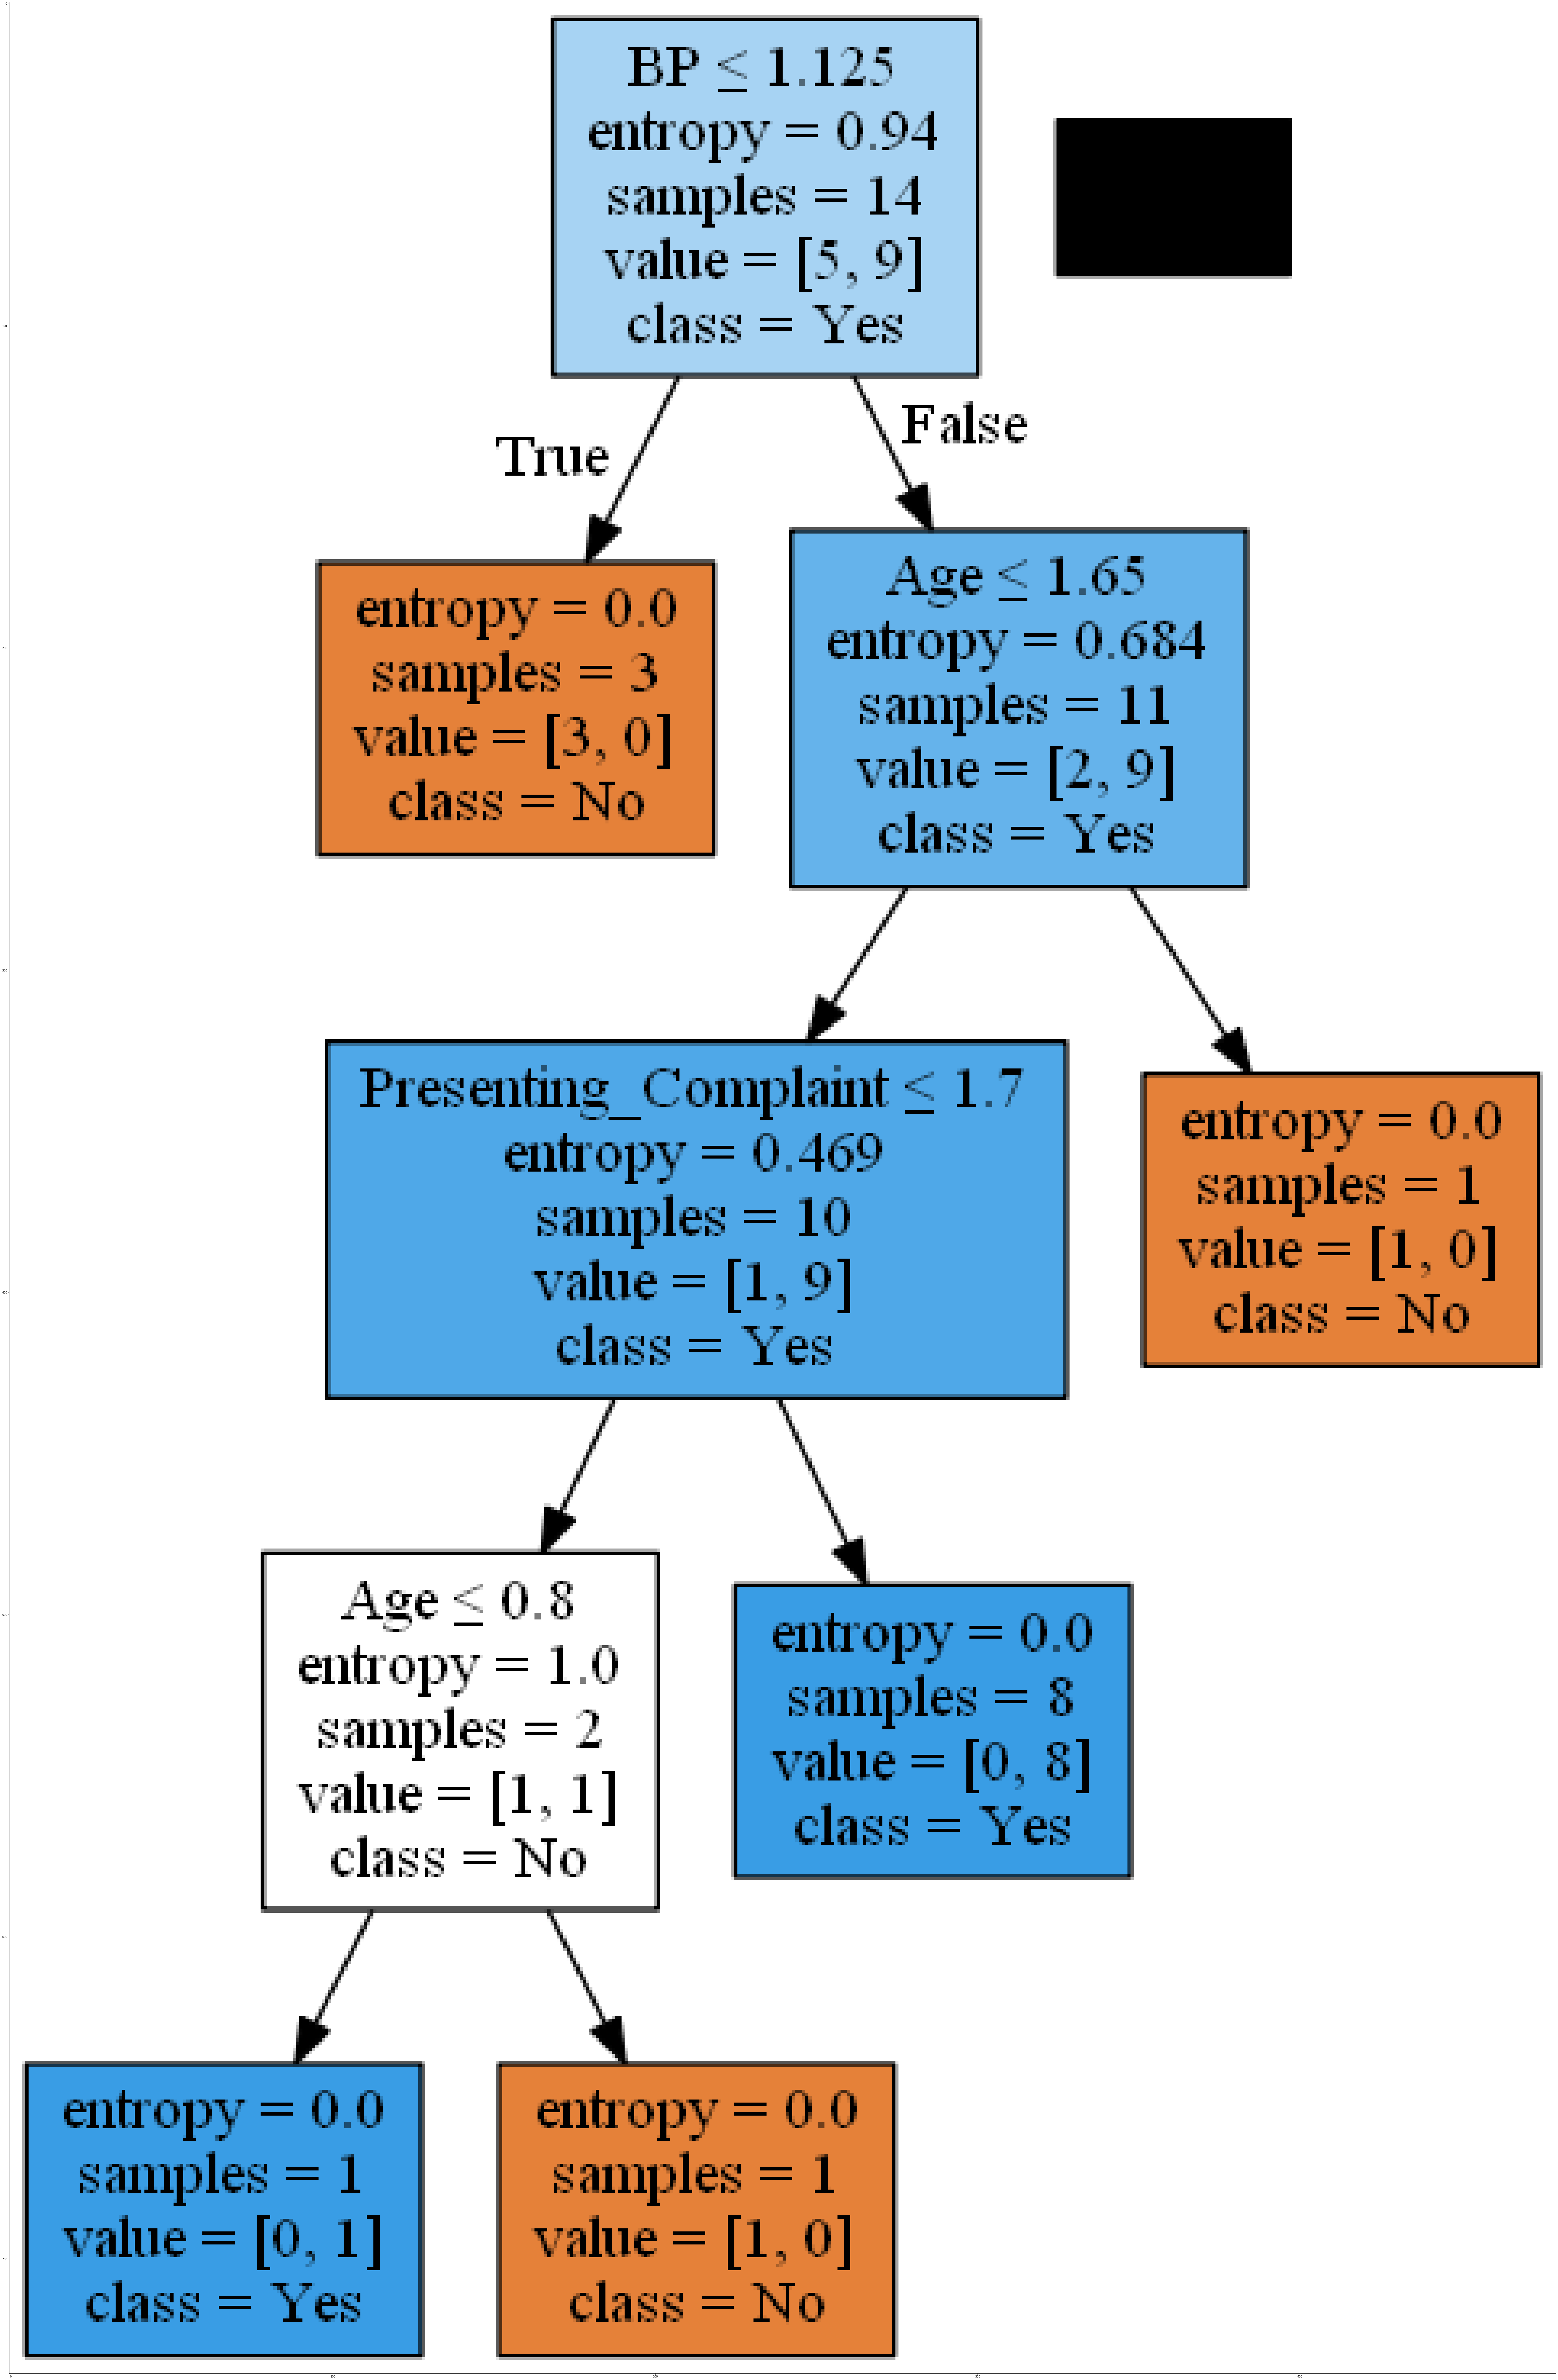

In [15]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Symptom"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames,out_file=dot_data, class_names= np.unique(y_trainset), filled=True,
special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [17]:
from sklearn.metrics import confusion_matrix

<h2> Evaluation</h2>

In [19]:
yhat_tree=drugTree.predict(X)
tree_jacc_test=metrics.jaccard_score(y, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)

tree_cnf_matrix

Accuracy is  0.75  F1 is 0.8444444444444444


array([[ 6,  2],
       [ 1, 12]], dtype=int64)

<b> The Clasifier is 84% accurate with F1-Scored and 75% accurate with Jaccard index metrices. Thus, we feel the classifier will perform extremely well with lage data set. </b>
